In [0]:
from google.colab import drive
user_name = '/content/drive'
drive.mount(user_name, force_remount=True)
import os
os.environ['OMP_NUM_THREADS'] = '1'
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/')
import CyclicMDP
from CyclicMDP import CyclicMDP
import numpy as np
import time
import datetime
import pickle as pkl

checkpoint_name = '/content/drive/My Drive/Colab Notebooks/Checkpoint/'



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


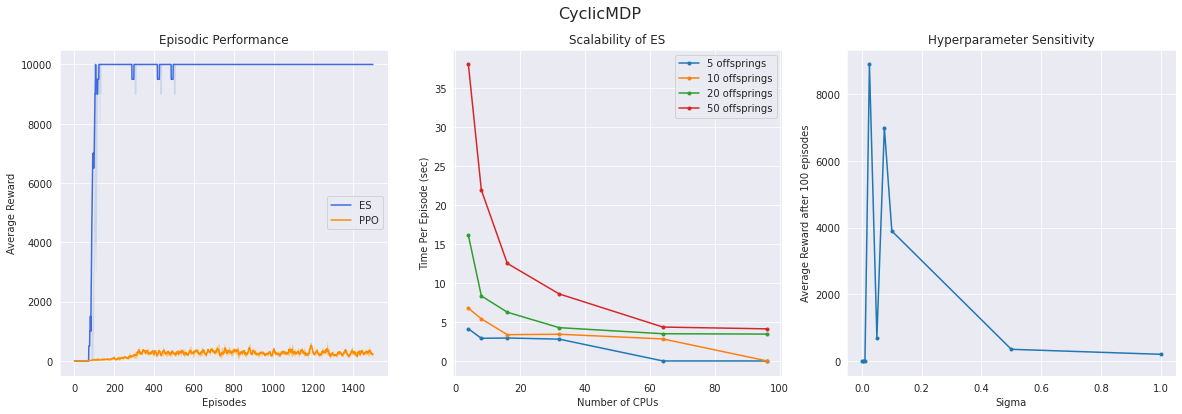

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
mdp_name = '/content/drive/My Drive/Colab Notebooks/CyclicMDP-Results/'


#################################### Prepare Rewards Data ####################################

env_name = 'Rewards'
sns.set_style('dark', {'axes.grid' : True})
alpha = 0.5
subt = 11

data_ppo_1 = pkl.load(open(mdp_name+env_name+'/v1'+'/data.pkl','rb'))
data_ppo_2 = pkl.load(open(mdp_name+env_name+'/v2'+'/data.pkl','rb'))
data_ppo_3 = pkl.load(open(mdp_name+env_name+'/v3'+'/data.pkl','rb'))
data_es = pkl.load(open(mdp_name+env_name+'/data.pkl','rb'))
avg_rewards = data_es['avg_reward'][:1500]
max_rewards = data_es['max_rewards'][:1500]
min_rewards = data_es['min_reward'][:1500]
avg_rolling_rewards = data_es['rolling_rewards'][:1500]
max_rolling_rewards = avg_rolling_rewards[:11]; min_rolling_rewards = avg_rolling_rewards[:11]
for k in range(11,len(avg_rewards)):
  max_rolling_rewards.append(np.mean(max_rewards[k-10:k]))
  min_rolling_rewards.append(np.mean(min_rewards[k-10:k]))
  
  time_list = data_es['time'][:1500]
  avg_rewards_ppo = []; max_rewards_ppo = []; min_rewards_ppo = []
  avg_rolling_rewards_ppo = []; max_rolling_rewards_ppo = []; min_rolling_rewards_ppo = []
  time_list_ppo = []
  i = 0; j = 0

  for i in range(0,1500): #len(data_ppo_2['avg_reward'])-subt
    avg_rewards_ppo.append(np.mean([data_ppo_1['avg_reward'][i],data_ppo_2['avg_reward'][i],data_ppo_3['avg_reward'][i]]))
    max_rewards_ppo.append(max([data_ppo_1['avg_reward'][i],data_ppo_2['avg_reward'][i],data_ppo_3['avg_reward'][i]]))
    min_rewards_ppo.append(min([data_ppo_1['avg_reward'][i],data_ppo_2['avg_reward'][i],data_ppo_3['avg_reward'][i]]))
  for j in range(0,1500):
    avg_rolling_rewards_ppo.append(np.mean([data_ppo_1['rolling_rewards'][j],data_ppo_2['rolling_rewards'][j],data_ppo_3['rolling_rewards'][j]]))
    max_rolling_rewards_ppo.append(max([data_ppo_1['rolling_rewards'][j],data_ppo_2['rolling_rewards'][j],data_ppo_3['rolling_rewards'][j]]))
    min_rolling_rewards_ppo.append(min([data_ppo_1['rolling_rewards'][j],data_ppo_2['rolling_rewards'][j],data_ppo_3['rolling_rewards'][j]]))
    time_list_ppo.append(min([data_ppo_1['time'][j],data_ppo_2['time'][j],data_ppo_3['time'][j]]))

plt.figure(figsize=(20,6))
plt.suptitle('CyclicMDP',fontsize='16')

plt.subplot(131)
plt.title('Episodic Performance')
plt.plot(avg_rolling_rewards, color='royalblue')
plt.fill_between(np.arange(0,len(avg_rolling_rewards),1),min_rolling_rewards,max_rolling_rewards,facecolor='lightsteelblue',alpha=alpha, linewidth=0, antialiased=True)
plt.plot(np.arange(0,len(avg_rolling_rewards_ppo),1),avg_rolling_rewards_ppo, color='darkorange')
plt.fill_between(np.arange(0,len(avg_rolling_rewards_ppo),1),min_rolling_rewards_ppo,max_rolling_rewards_ppo,facecolor='orange',alpha=alpha, linewidth=0, antialiased=True)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.legend(['ES','PPO'])


#################################### Prepare CPU Data ####################################
env_name = 'CPUs'

cpu_list = [4,8,16,32,64,96]
pop_list = [5,10,20,50]

plt.subplot(132)
plt.title('Scalability of ES')
for pop in range(0,len(pop_list)):
  plot_list = []
  for cpu in range(0,len(cpu_list)):
    data_es = pkl.load(open(mdp_name+env_name+'/'+str(cpu_list[cpu])+'_'+str(pop_list[pop])+'.pkl','rb'))
    time = data_es['time'][-1]
    plot_list.append(time)
  plt.plot(cpu_list, plot_list, marker='.')
plt.legend(['5 offsprings','10 offsprings','20 offsprings','50 offsprings'])
plt.xlabel('Number of CPUs')
plt.ylabel('Time Per Episode (sec)')


#################################### Prepare Sensitivity Data ####################################
env_name = 'Sigma'

sigma_list = [0.001,0.005,0.01,0.025,0.05,0.075,0.1,0.5,1]

plot_list = []
for sigm in range(0,len(sigma_list)):
    data_es = pkl.load(open(mdp_name+env_name+'/'+str(sigma_list[sigm])+'.pkl','rb'))
    plot_list.append(np.mean(data_es['avg_reward'][:100]))

plt.subplot(133)
plt.title('Hyperparameter Sensitivity')
plt.plot(sigma_list, plot_list, marker='.')
plt.ylabel('Average Reward after 100 episodes')
plt.xlabel('Sigma')

plt.show()







In [0]:

  plt.figure(figsize=(20,6))
  plt.suptitle(env_name,fontsize='16')

  plt.subplot(131)
  plt.title('Episodic Reward')
  plt.plot(np.arange(0,len(avg_rewards),1),avg_rewards, color='royalblue')
  plt.fill_between(np.arange(0,len(avg_rewards),1),min_rewards,max_rewards,facecolor='lightsteelblue', alpha=alpha, linewidth=0, antialiased=True)
  plt.plot(np.arange(0,len(avg_rewards_ppo),1),avg_rewards_ppo, color='darkorange')
  plt.fill_between(np.arange(0,len(avg_rewards_ppo),1),min_rewards_ppo,max_rewards_ppo,facecolor='orange',alpha=alpha, linewidth=0, antialiased=True)
  plt.legend(['ES','PPO'])

  plt.subplot(132)
  plt.title('Rolling Average Reward')
  plt.plot(avg_rolling_rewards, color='royalblue')
  plt.fill_between(np.arange(0,len(avg_rolling_rewards),1),min_rolling_rewards,max_rolling_rewards,facecolor='lightsteelblue',alpha=alpha, linewidth=0, antialiased=True)
  plt.plot(np.arange(0,len(avg_rolling_rewards_ppo),1),avg_rolling_rewards_ppo, color='darkorange')
  plt.fill_between(np.arange(0,len(avg_rolling_rewards_ppo),1),min_rolling_rewards_ppo,max_rolling_rewards_ppo,facecolor='orange',alpha=alpha, linewidth=0, antialiased=True)
  plt.legend(['ES','PPO'])

  plt.subplot(133)
  plt.title('Time Per Episode')
  plt.plot(time_list,color='royalblue')
  plt.plot(time_list_ppo,color='darkorange')
  plt.legend(['ES (50 offsprings)','PPO (1 model)'])


